# Importação de Bibliotecas

In [1]:
#importando bibliotecas
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Carregando as variaveis tratadas no pré processamento
with open('../../../01-Análise Exploratória/Pré-Processamento/Credit Risk/base/credit.pkl', 'rb') as f:
    x_train, x_test, y_train, y_test = pickle.load(f)

In [3]:
forest = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state = 0)
forest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

In [4]:
previsoes = forest.predict(x_test)

In [5]:
#Acurácia do modelo
accuracy_score(y_test, previsoes)

0.844713825379776

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91      5179
         1.0       0.66      0.51      0.57      1338

    accuracy                           0.84      6517
   macro avg       0.77      0.72      0.74      6517
weighted avg       0.83      0.84      0.84      6517



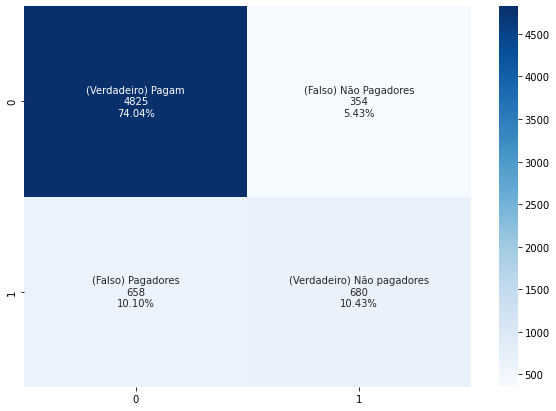

In [6]:
#Resultado da Classificação



print(classification_report(y_test, previsoes))
cf_matrix = confusion_matrix(y_test, previsoes)

plt.figure(figsize = (10,7))

group_names = ['(Verdadeiro) Pagam','(Falso) Não Pagadores','(Falso) Pagadores','(Verdadeiro) Não pagadores']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns_plot = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.savefig('img/confusion_matrix.png', dpi=300)